# correlacion cruzada (Cross-correlation) (convolucion)

## Motivacion.
Queremos hallar medidas de similitud entre objetos. Hemos visto muchos tipos de productos (multiplicaciones): Hadamard, interno, cruz, matricial. Pero el producto interno es bueno para hallar similitudes. Vemos por que.


Sean $X=x_i$, $Y=y_i$, entonces

$$ X \cdot Y = \sum_i x_i y_i = \| X \| \| Y \| \cos \theta .$$

Usted podria pensar que la similitud se debe medir con la norma de la diferencia. Es decir,

$$ \| X - Y \| \ll 1$$ entonces los objetos son similares
$$ \| X - Y \| \approx 0$$ entonces los objetos son similares.
Esto no siempre funciona. Funciona en optimizacion para redes neuronales (backpropagation) pero aca estamos hablando de otra cosa.


$$X  =
\begin{pmatrix} 1 \\ -10 \\ 5 \end{pmatrix} \quad , \quad
Y  = \begin{pmatrix} 10 \\ -100 \\ 50 \end{pmatrix}  .$$

Estos dos vectores son muy distintos con la norma

$$ \| X - Y \| = \sqrt{9^2 + 90^2 + 45^2} =101.02474944289642 $$
Sin embargo desde el punto de vista de la fase, son el mismo vector.

Si normalizamos $\hat{X} = \hat{Y}$.

El coseno del angulo es

$$\cos \theta = \frac{X \cdot Y}{\| X \| \| Y \|} .$$
Ese coseno es maximo (1) cuando $X$ y $Y$ estan alineados,
es 0 cuando $X,Y$ son ortogonales. No tienen ningun tipo de **correlacion**, si el coseno es -1 entonces hay **anticorrelacion** (los picos se besan con los valles).




Si dos objetos tiene los picos y valles alineados, tiene una buena correlacion. Ahora bien, puede que halla un **desface**

Suponga un objeto $f(\theta) = a_i \sin \theta$. Si $a_i=1,10$
son dos objetos distintos. La amplitud de uno es 10 veces la del otro pero la **forma**.

Asumaos una funcion $f(t) = a_1 \cos(t + \phi) .$
y otra $g(t) = a_2 \cos t$.  Ademas de la amplitud, la fase de
corrimiento $\phi$. Podemos determinar esta face $\phi$ con correlaciones.

Que es correlacion para los vectores $X,Y$.
Basicamente en el $\cos \theta$ ignoremos el denominador.
Pensemos en que los objetos con el producto punto $X \cdot Y$
producen un numero. Vamos a correr  desplazar uno de ellos, y verficar con el producto punto que pasa?
Por ejemplo, en vez $g(t)$, piense en $g(t + \tau)$,
luego compare $g(t + \tau)$, $f(t)$, se pueden hacer varias comparaciones, hasta que $\tau = \phi$.

Como se hacen las mediciones para comparar?

Veamos un ejemplo.

* $$X = (0, 1, 1, 0, 0,0,0)  \quad , \quad Y=(0,0,0,1,1,0,0) $$

* Vamos a correr el primer vector y dejar el segundo quieto.

$$ X_0 \cdot Y = 0\times 0 + 1 \times 0 + 1 \times 0 +0 \times 1 + 0 \times 1 + 0 \times 0 + 0 \times 0 = 0 $$
Corremos 1 lugar el vector $X$ lo llamamos $X_1$

$$ X_1 = (0, 0, 1,1, 0, 0, 0)$$


$$ X_1 \cdot Y = 0\times 0 + 0 \times 0 + 1 \times 0 +0 \times 1 + 0 \times 1 + 0 \times 0 + 0 \times 0 = 0 $$

* Segundo corrimiento
$$ X_2 = (0, 0, 0, 1,1, 0, 0)$$ (shift)

Tarea muestre que $X \cdot Y = 2$.
y el shift 2 le genera lo que buscaba, $X_2 = Y$..

Si yo quiero encotrar el corrimiento (shift) $\phi$ con distintos valores de $\tau$.


$$\langle f(t), g(t + \tau) \rangle = \int_D f(t) g(t + \tau) dt .$$

Definimos
$$h(\tau) = \langle f(t), g(t + \tau) \rangle = \int_D f(t) g(t + \tau) dt .$$
como correlacion entre las funciones $f,g$.


Para el ejemplo de nosotros
Notacion $\star$, ojo que no todos autores usan la misma notacion.
$$ h(\tau) =f(t) \star g(t) = \int_D f(t) g(t + \tau)dt = \int_D \cos(t + \phi) \cos(t + \tau).$$

El dominio que vamos a usar es $D=[0 , 2 \pi]$


$$h(\tau) = \int_0^{2 \pi} \cos(t + \phi) \cos(t + \tau) dt= \pi \cos(\tau - \phi) .$$

Para calcular esta integral


$$ \cos \alpha \cos \beta = \frac{\cos(\alpha + \beta) + \cos(\alpha - \beta)}{2}.$$



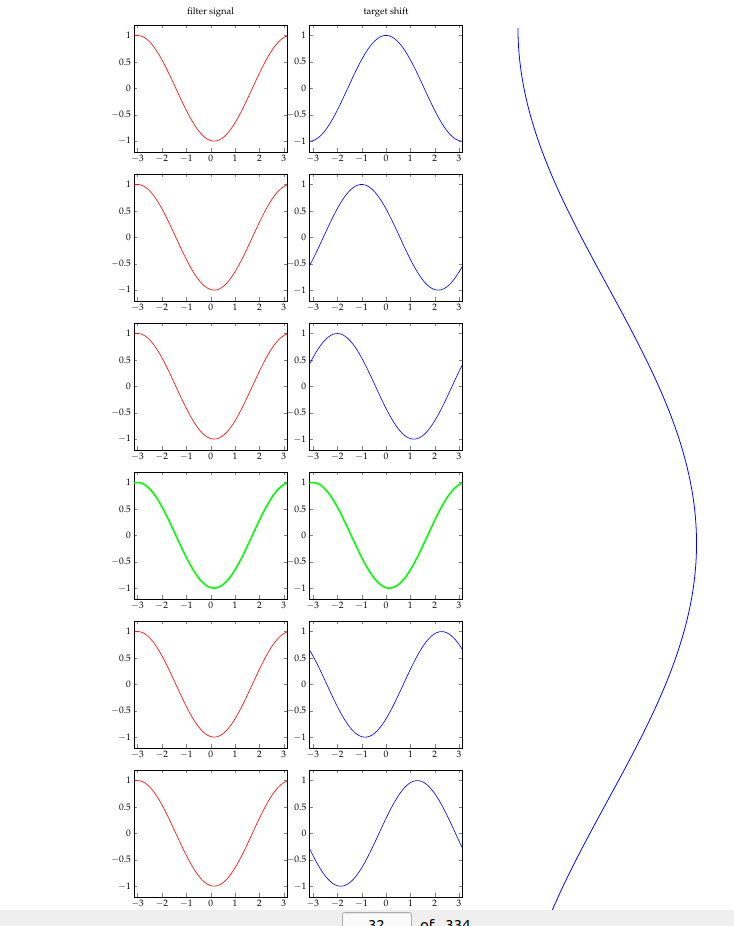

El caption de la figura:

Figure 3.2: Illustration of cross-correlation. By shifting the filter in the right column of the
table of functions and taking inner products with the filter function in the left column we
can figure out the amount of shifting to get the maximum correlation between the target
and the filter function. The blue curve on the right represents the cross-correlation with
τ = [ 0, 2π ] and the maximum is located in the center corresponding to τ = π.

Cuando hize la figura hice el "shift" con radianes,
1, 2, 3, 4,5, 6 y el pico salio en $3$.

El mundo de la computacion es discreto, entonces veamos la defincion de cross-correlation en el discreto
$x=(x_i)$, $y=(y_i)$,

$$ z_j = (x \star y)_j = \sum_i y_i x_{i+j} .$$
Para saber en que mundo vive el indice $i$ debemos comenzar por medir la longitud de los datos $x$ y filtro $y$.

* Sea $N_x$ es el numero de componentes de datos
* Sea $N_y es el numero de componentes del filtro

Tenemos lo siguiente.

$$  0 \le i+j < N_x$$
$$ 0 \le i <  N_y$$



$$ z_j = (x \star y)_j = \sum_{i=0}^{N_y-1}  y_i x_{i+j} \quad , \quad j=0,1, \cdots, N_x-N_y. \tag{1}$$

El conteo de elementos de salida es $N_x - N_y +1 $.




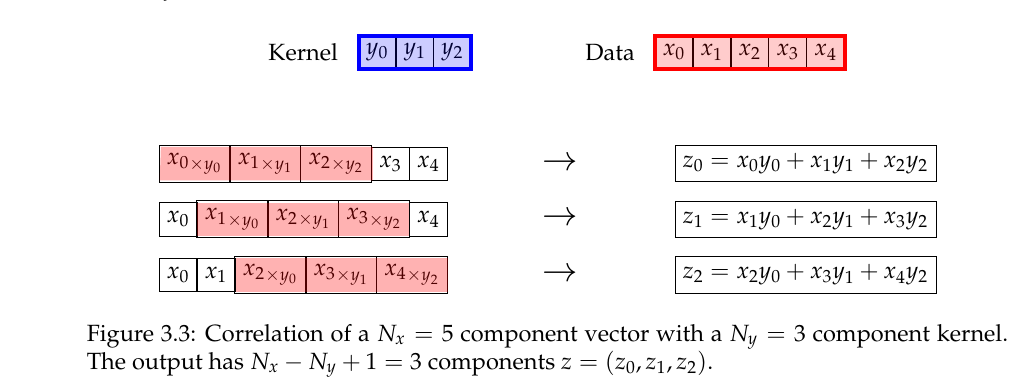

Cuantos elementos tiene la salida? De la ecuacion (1) esta claro que los elementos de la salida son $Nx - N_y + 1$.


$$X = (1, 1, 1, 1, 1)$$
$$ Y= (1,2,3)$$

$$ X \star Y = (6, 6, 6) $$

$$ Y= (1,1,1)$$
$$ X \star Y = (3, 3, 3) $$

**Padding**:

* El padding se usa para manejar el numero de datos de salida.
* Tambien para usar la mayor parte de los datos, mas cubrimiento, con el problema de que crea efectos de borde. Ejemplo ver el trapecio de abajo..

Hagamos un padding (relleno) de $p=1$ en el primer ejemplo

$$X = (0, 1, 1, 1, 1, 1, 0 )$$
$$ Y= (1,2,3)$$

$$X \star Y = ( 5, 6, 6, 6,5) .$$
El numero de datos de salida crecio. Hay efectos de borde.

El padding se puede hacer con 0 o con los primeros vecinos (para mas suavidad)

$$X = (1, 1, 1, 1, 1, 1, 1 )$$
$$ Y= (1,2,3)$$
$$X \star Y = ( 6, 6, 6, 6,6) .$$

Al agregar padding $N_x \implies N_x + 2p$.
por que padding se hace en los dos lados (izquierdo y derecho).

A lo ultimo el numero de elementos de salida es

$$ N_x - N_y + 1 + 2 p .$$

Pregunta: Cuanto es el padding $p$ para que el numero de elementos de entrada sea igual al de salida.


$$ \cancel{N_x} - N_y + 1 + 2 p = \cancel{N_x} .$$
Despeje $ p = (N_y -1)/2$.

A este tipo de **padding** se le llama **same**, **half padding**.

Existe otro concepto que es **full padding**. Cuando el filtro toca, para empezar, el primer elemento.

Que es **full paddding*

Datos
$$ xxxxxxxxxxxx $$
   xxxxxxxxxxxx
Filtro

$$ xxxx $$

Ful padding
\begin{eqnarray}
 &&   \hspace{9mm} xxxxxxxxxxxx \\
&& xxxx
\end{eqnarray}

Cual es la derivada de $(1,3,-2,5,5)$
$$(2, -5, 7, 0) $$

Cual es la derivada de $(0, 1,3,-2,5,5,0)$
$$(1, 2, -5, 7, 0, -5) $$

$f(x)=x$

$$(1,2,3,4,5) .$$
$f'(x)=1$

$$(1, 1, 1, 1) $$ (cero error)

padding con 1
$$(1, 1,2,3,4,5, 1) .$$
$$(0, 1, 1, 1,-4) $$ (cero error)





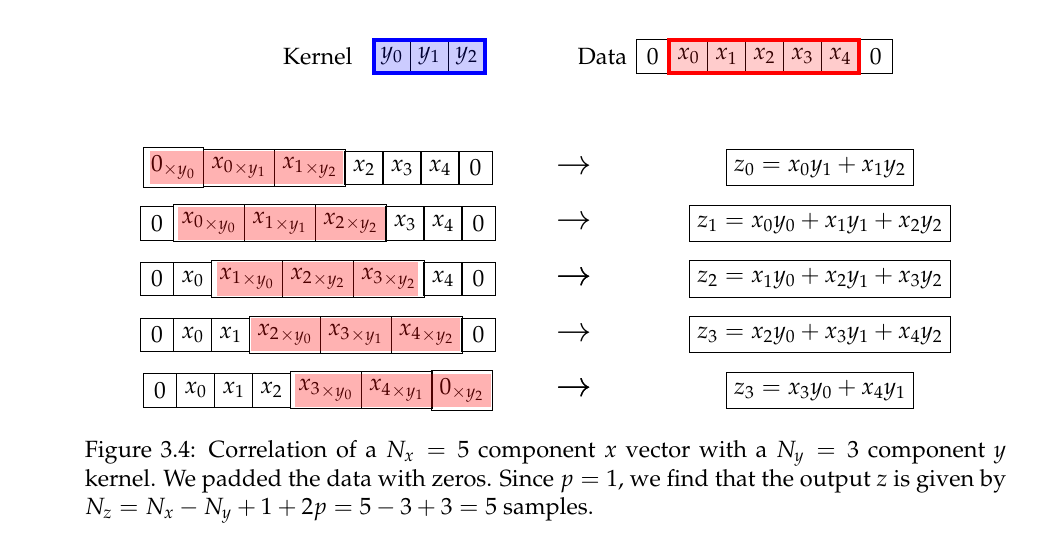

**Stride** (paso).  El objeto de **stride** es "brincar" para ahorrar memoria y acelerar procesos.


$$ z_j = x_i \star y_i =  \sum_{i=0}^{N_y-1} y_i x_{i+j}
\quad , \quad j=0, s, 2s, \cdots , ks, ks \le N_y - N_x  .$$

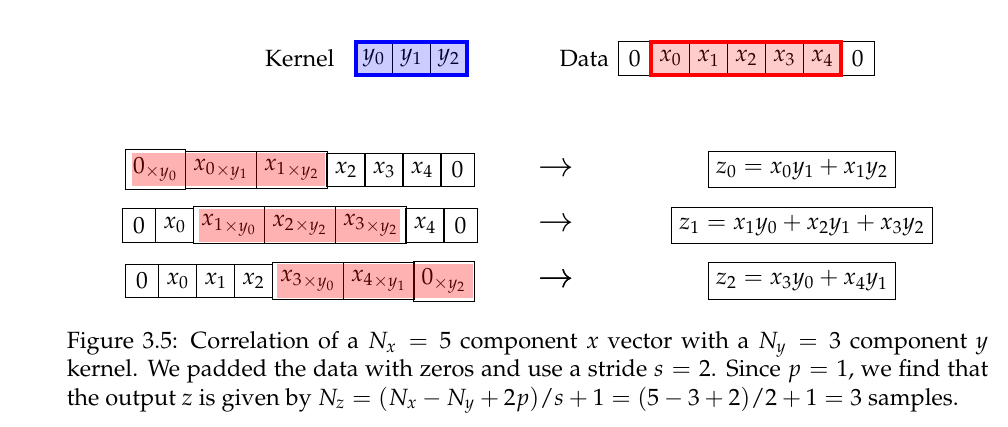

El numero de muestras de salida es:
$$ N_z = (N_x - N_y + 2p)/s + 1.$$
$s$ ayuda en el ahorro de memoria y rapidez en los calculos, pero **ojo** se pierde resolucion.




#Proxima clase: Pasar lo que vimos en esta a varios rangos de tensor.